In [15]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end= '2019-12-17')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575916
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643497
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783867
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917507
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897017
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.616821
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.786606
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.694427


In [16]:
df.shape

(2003, 6)

Text(0, 0.5, 'Close Price USD')

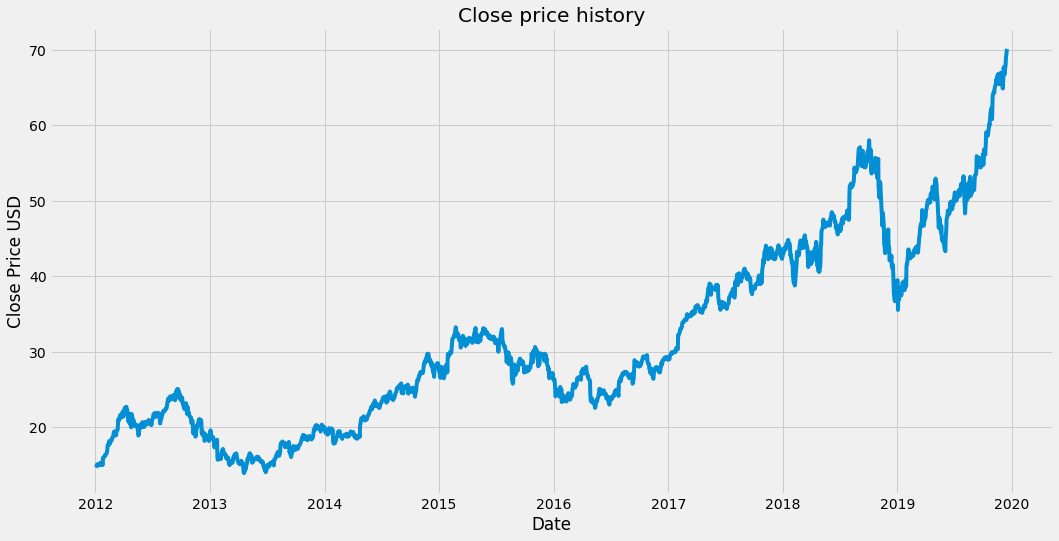

In [17]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')

In [18]:
df = df['Close'].values
df = df.reshape(-1,1)

#The reshape allows you to add dimensions or change the number of elements in each dimension. We are using reshape(-1, 1) 
# because we have just one dimension in our array, so numpy will create the same number of our rows and 
# add one more axis: 1 to be the second dimension.

In [19]:
#split data
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [20]:
#scale data
scaler = MinMaxScaler(feature_range= (0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.fit_transform(dataset_test)
dataset_train

array([[0.02202713],
       [0.0243788 ],
       [0.02926309],
       ...,
       [0.98919928],
       [0.98592179],
       [0.97318442]])

In [21]:
# function to create datasets

def create_dataset(df):
    x= []
    y = []
    for i in range (50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)

    return x, y

In [22]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [23]:
#3d array reshapingfor LSTM layers
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [24]:
model = Sequential()
model.add(LSTM(units=96,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 96, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 96)               

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h2')

Epoch 1/50
49/49 [==============================] - 10s 67ms/step - loss: 0.0536
Epoch 2/50
49/49 [==============================] - 3s 68ms/step - loss: 0.0032
Epoch 3/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0027
Epoch 4/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0024
Epoch 5/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0027
Epoch 6/50
49/49 [==============================] - 3s 64ms/step - loss: 0.0025
Epoch 7/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0021
Epoch 8/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0025
Epoch 9/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0034
Epoch 10/50
49/49 [==============================] - 3s 67ms/step - loss: 0.0024
Epoch 11/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0025
Epoch 12/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0023
Epoch 13/50
49/49 [=================

INFO:tensorflow:Assets written to: stock_prediction.h2\assets


INFO:tensorflow:Assets written to: stock_prediction.h2\assets


In [31]:
model = load_model('stock_prediction.h2')

In [32]:
scaler.scale_

array([0.02893937])

In [ ]:
#scale_factor = 1/0.02893937
#y_train = y_train * scale_factor
#y_test = y_test * scale_factor

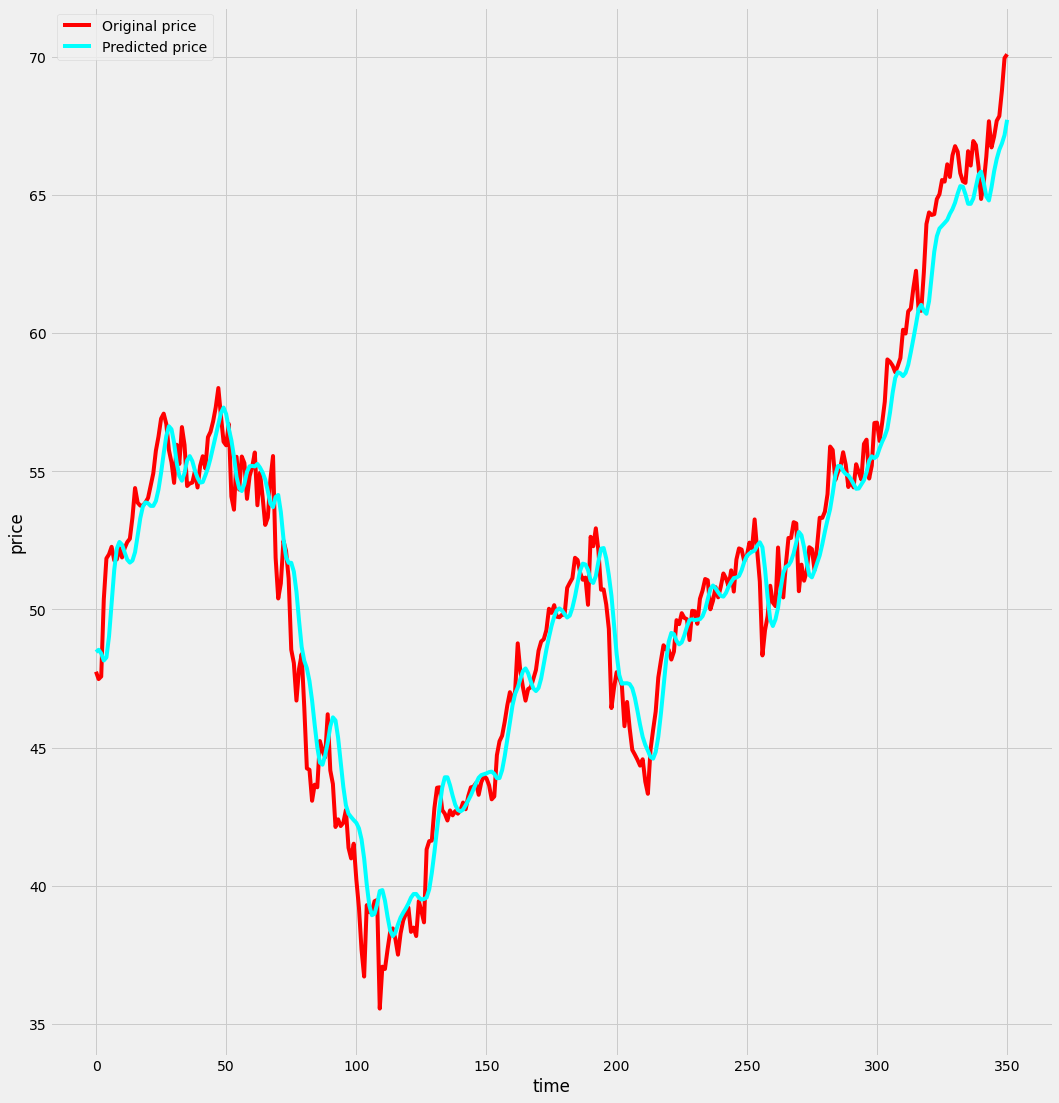

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(16,18))
#ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()